In [1]:
pip install fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 7.8 MB/s 
     |████████████████████████████████| 61 kB 9.9 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.4.4
    Uninstalling fastcore-1.4.4:
      Successfully uninstalled fastcore-1.4.4
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastbook import *

     |████████████████████████████████| 719 kB 34.6 MB/s 
     |████████████████████████████████| 4.4 MB 58.2 MB/s 
     |████████████████████████████████| 362 kB 67.0 MB/s 
     |████████████████████████████████| 1.2 MB 58.5 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 1.1 MB 66.6 MB/s 
     |████████████████████████████████| 140 kB 69.0 MB/s 
     |████████████████████████████████| 212 kB 71.8 MB/s 
     |████████████████████████████████| 596 kB 9.2 MB/s 
     |████████████████████████████████| 127 kB 66.7 MB/s 
     |████████████████████████████████| 144 kB 69.7 MB/s 
     |████████████████████████████████| 94 kB 4.8 MB/s 
     |████████████████████████████████| 271 kB 71.0 MB/s 
     |████████████████████████████████| 6.6 MB 1.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 

In [3]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.179675,0.015508,0.004736,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.056320,0.008849,0.002706,01:03


In [4]:
1+1

2

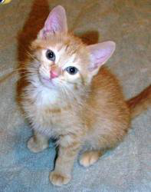

In [5]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.765785,2.111683,00:02


epoch,train_loss,valid_loss,time
0,1.614161,1.551226,00:02
1,1.431337,1.514621,00:02
2,1.330607,1.153007,00:02
3,1.185372,1.105136,00:02
4,1.069716,0.927903,00:02
5,0.969108,0.882131,00:02
6,0.889251,0.896584,00:02
7,0.823075,0.871366,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


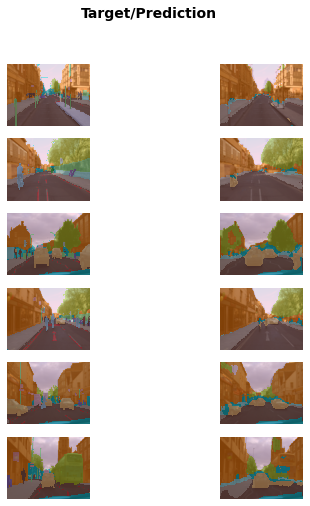

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

In [11]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.457933,0.390531,0.827000,03:29


epoch,train_loss,valid_loss,accuracy,time
0,0.311916,0.254222,0.898040,07:36
1,0.236987,0.204687,0.919920,07:36
2,0.188130,0.188175,0.928640,07:36
3,0.142238,0.198772,0.928480,07:35


In [12]:
learn.predict("I really liked that movie!")


('pos', tensor(1), tensor([6.1407e-05, 9.9994e-01]))

In [13]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.386991,0.388698,0.817875,00:04
1,0.362179,0.360333,0.830160,00:04
2,0.348319,0.353973,0.833999,00:04


In [15]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.521985,1.366753,00:00


epoch,train_loss,valid_loss,time
0,1.379865,1.304656,00:00
1,1.285757,1.114312,00:00
2,1.030688,0.816805,00:00
3,0.806604,0.688206,00:00
4,0.702477,0.659664,00:00
5,0.659867,0.652258,00:00
6,0.645855,0.648555,00:00
7,0.630398,0.646455,00:00
8,0.623651,0.646068,00:00
9,0.615209,0.645975,00:00


In [16]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,100.0,78.0,3.0,3.131013
1,46.0,95.0,3.0,3.047804
2,41.0,24.0,4.0,3.509111
3,39.0,65.0,3.0,3.760557
4,54.0,65.0,4.5,3.596454
5,72.0,35.0,3.0,3.267768
6,35.0,81.0,4.0,2.973591
7,86.0,34.0,2.5,3.600284
8,10.0,77.0,5.0,4.268673
